In [32]:
from pandas import read_excel, DataFrame,get_dummies
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os   
import statsmodels.api as sm
from pandas import concat
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from helper import my_logit,scailing,is_categorical,my_ols, independence_test, normality_test

In [3]:
df =read_excel("./한국복지패널_17차.xlsx")

In [4]:
colname = df.iloc[1]
df.columns = colname
df= df.drop(1)
df.reset_index(drop=True, inplace=True)

In [5]:
df

1,h17_pid,h17_id,h17_reg7,h17_din,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_5,new_h1701_6,new_h1703_4,...,new_h1703_5,h1707_3aq1,h1707_3aq2,h1707_3aq5,h1707_6aq1,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4
0,id,id,category,numeric,category,category,category,numeric,category,category,...,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
1,201,2,1,405,1,10,2,1945,4,9,...,0,50,30,12,3.9,5,63,15,3,8
2,301,3,1,2788,1,10,1,1948,3,2,...,0,40,25,19,5.3,2,23,2,46,2
3,401,4,1,2304,1,10,1,1942,7,3,...,0,40,3,14,7.9,5,17,5,18,16
4,601,6,1,5231,1,10,1,1962,6,1,...,0,80,38,26,11.5,13,24,13,53,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,1200902,12009,5,8548,2,20,2,1977,7,9,...,2,82,49,15,3,21,50,2,36,16
12013,1201001,12010,2,8452,1,10,1,1975,7,1,...,1,100,30,11,5,13,5,5,20,10
12014,1201002,12010,2,8452,2,20,2,1976,7,9,...,1,100,30,11,5,13,5,5,20,10
12015,1201101,12011,6,7094,1,10,1,1964,7,6,...,0,53,17,12,4.8,6,1,1,46,12


In [77]:
numeric_columns = [col for col in df.columns if df.iloc[0][col] == 'numeric'or 'id']
numeric_data = {col: df[col] for col in numeric_columns}
numeric_df = pd.DataFrame(numeric_data)
numeric_df = numeric_df.drop(0)

In [7]:
numeric_df

,h17_din,new_h1701_5,h1706_6,h1707_3aq9,h1707_3aq10,new_h1703_5,h1707_3aq1,h1707_3aq2,h1707_3aq5,h1707_6aq1,h1707_3aq7,h1707_3aq8,h1707_3aq11,h1707_5aq3,h1707_5aq4
1,405,1945,100000,0,0,0,50,30,12,3.9,5,63,15,3,8
2,2788,1948,500,0,0,0,40,25,19,5.3,2,23,2,46,2
3,2304,1942,40000,0,0,0,40,3,14,7.9,5,17,5,18,16
4,5231,1962,70000,6,137,0,80,38,26,11.5,13,24,13,53,11
5,5231,1963,70000,6,137,0,80,38,26,11.5,13,24,13,53,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,8548,1977,70000,2,60,2,82,49,15,3,21,50,2,36,16
12013,8452,1975,30000,0,30,1,100,30,11,5,13,5,5,20,10
12014,8452,1976,30000,0,30,1,100,30,11,5,13,5,5,20,10
12015,7094,1964,10000,0,0,0,53,17,12,4.8,6,1,1,46,12


In [8]:
numeric_df1 =numeric_df.rename(columns= 
{'h17_din':'disposable_income',
'new_h1701_5':"age",
"h1706_6":"house_price",
"h1707_3aq9":"pub_edu",
"h1707_3aq10":"priv_edu",
"new_h1703_5":"num_of_child",
"h1707_3aq1": "home_meal",
"h1707_3aq2": "meal_out",
"h1707_3aq5": "utility_bills",
"h1707_6aq1": "heating_bills",
"h1707_3aq7": "apparel",
"h1707_3aq8": "insurance",
"h1707_3aq11":"entertainment",
"h1707_5aq3":"transportation",
"h1707_5aq4":"phone"})
numeric_df1[numeric_df1.columns] = numeric_df1[numeric_df1.columns].astype('int')
numeric_df1

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,home_meal,meal_out,utility_bills,heating_bills,apparel,insurance,entertainment,transportation,phone
1,405,1945,100000,0,0,0,50,30,12,3,5,63,15,3,8
2,2788,1948,500,0,0,0,40,25,19,5,2,23,2,46,2
3,2304,1942,40000,0,0,0,40,3,14,7,5,17,5,18,16
4,5231,1962,70000,6,137,0,80,38,26,11,13,24,13,53,11
5,5231,1963,70000,6,137,0,80,38,26,11,13,24,13,53,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,8548,1977,70000,2,60,2,82,49,15,3,21,50,2,36,16
12013,8452,1975,30000,0,30,1,100,30,11,5,13,5,5,20,10
12014,8452,1976,30000,0,30,1,100,30,11,5,13,5,5,20,10
12015,7094,1964,10000,0,0,0,53,17,12,4,6,1,1,46,12


#### 나이 컬럼 출생년도에서 2022년 기준 나이로 변환

In [9]:
numeric_df1['age'] = pd.Series([2022] * (len(numeric_df)-1)) - numeric_df1['age']

In [10]:
(numeric_df1==0).sum()

disposable_income        0
age                      0
house_price           1339
pub_edu              10416
priv_edu              9987
num_of_child          9340
home_meal             8438
meal_out              8844
utility_bills         8439
heating_bills         8457
apparel               8803
insurance             8540
entertainment         8836
transportation        8573
phone                 8455
dtype: int64

#### 0~17세 이하의 자녀가 있는 경우만을 고려

In [11]:
edf = numeric_df1[(numeric_df1['num_of_child'] != 0)]

In [12]:
for col in edf.columns:
    outlier =np.percentile(edf[col], 75) - np.percentile(edf[col],25)
    mean = edf[col].mean()
    std = edf[col].std()
    
    for index, value in enumerate(edf[col]):
        z_score = (value - mean) / std
        if abs(z_score) > outlier:
            edf.loc[index, col] = None  # Replace outlier with NaN

print(edf)

      disposable_income   age  house_price  pub_edu  priv_edu  num_of_child  \
11               5958.0  44.0      21000.0     88.0      67.0           1.0   
12               5958.0  47.0      21000.0     88.0      67.0           1.0   
21               1969.0  61.0      25000.0      0.0       0.0           1.0   
22               3406.0  40.0     100000.0      0.0       0.0           1.0   
23               3406.0  38.0     100000.0      0.0       0.0           1.0   
...                 ...   ...          ...      ...       ...           ...   
2355                NaN   NaN          NaN      NaN       NaN           NaN   
2495                NaN   NaN          NaN      NaN       NaN           NaN   
2511                NaN   NaN          NaN      NaN       NaN           NaN   
2512                NaN   NaN          NaN      NaN       NaN           NaN   
2536                NaN   NaN          NaN      NaN       NaN           NaN   

      home_meal  meal_out  utility_bills  heating_b

C:\Users\yis82\AppData\Local\Temp\ipykernel_76788\4073754640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf.loc[index, col] = None  # Replace outlier with NaN


In [13]:
edf.dropna(axis=0,inplace  = True)

In [50]:
(edf == 0).sum()

disposable_income       0
age                     0
house_price           171
pub_edu              1850
priv_edu             1017
num_of_child            0
home_meal            2127
meal_out             2132
utility_bills        2127
heating_bills        2127
apparel              2131
insurance            2137
entertainment        2153
transportation       2132
phone                2127
dtype: int64

In [15]:
model = my_ols(edf,'priv_edu',['disposable_income', 'age', 'house_price', 'pub_edu', 'num_of_child',
       'home_meal', 'meal_out', 'utility_bills', 'heating_bills', 'apparel',
       'insurance', 'entertainment', 'transportation', 'phone'])
model.summary

['disposable_income', 'age', 'house_price', 'pub_edu', 'priv_edu', 'num_of_child', 'home_meal', 'meal_out', 'utility_bills', 'heating_bills', 'apparel', 'insurance', 'entertainment', 'transportation', 'phone']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     57.41
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          8.34e-141
Time:                        13:52:05   Log-Likelihood:                -13827.
No. Observations:                2627   AIC:                         2.768e+04
Df Residuals:                    2612   BIC:                         2.777e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            21.2409      5.029      4.223      0.000      11.379      31.103
disposable_income     0.0037      0.000     14.395      0.000       0.003       0.004
age                  -0.6165      0.079     -7.810      0.000      -0.771      -0.462
house_price           0.0003   2.65e-05     11.275      0.000       0.000       0.000
pub_edu               0.1426      0.042      3.388      0.001       0.060       0.225
num_of_child          6.5469      1.053      6.220      0.000       4.483       8.611
home_meal             0.2592      0.082      3.147      0.002       0.098       0.421
meal_out              0.1195      0.106      1.126      0.260      -0.089       0.328
utility_bills        -1.5404      0.839     -1.835      0.067      -3.186       0.106
heating_bills        -1.4015      1.233     -1.136      0.256      -3.820       1.017
apparel               0.7392      0.197      3.756      0.000       0.353       1.125
insurance            -0.1423      0.095     -1.504      0.133      -0.328       0.043
entertainment        -0.2110      0.115     -1.830      0.067      -0.437       0.015
transportation       -0.0338      0.029     -1.162      0.245      -0.091       0.023
phone                 0.8049      0.321      2.507      0.012       0.175       1.435
==============================================================================
Omnibus:                      992.244   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5597.500
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       9.298   Cond. No.                     2.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
categorical_columns = [col for col in df.columns if df.iloc[0][col] == 'category']
categorical_columns
categorical_data = {col: df[col] for col in categorical_columns}
category_df = pd.DataFrame(categorical_data)
category_df= category_df.drop(0)
category_df

,h17_reg7,new_h1701_2,new_h1701_3,new_h1701_4,new_h1701_6,new_h1703_4,h1706_1,p1703_6,p1703_7,p1703_8,p1703_9,p1703_12,wc17_8aq6,wc17_8aq8,wc17_8,wc17_29,wc17_30,wc17_39
1,1,1,10,2,4,9,2,1,3,3,2,1,0,0,0,0,0,0
2,1,1,10,1,3,2,2,4,4,4,4,4,0,0,0,0,0,
3,1,1,10,1,7,3,1,2,5,2,4,4,0,0,0,0,0,0
4,1,1,10,1,6,1,2,3,4,5,4,4,4,4,2,2,2,2
5,1,2,20,2,5,2,2,2,2,4,4,4,3,2,3,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,5,2,20,2,7,9,5,4,4,4,4,4,0,0,0,0,0,0
12013,2,1,10,1,7,1,5,3,4,4,4,4,0,0,0,0,0,0
12014,2,2,20,2,7,9,5,0,0,0,0,0,0,0,0,0,0,0
12015,6,1,10,1,7,6,5,4,4,4,4,4,0,0,0,0,0,0


In [17]:
category_df[category_df.columns] = category_df[category_df.columns].astype('category')
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12016 entries, 1 to 12016
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   h17_reg7     12016 non-null  category
 1   new_h1701_2  12016 non-null  category
 2   new_h1701_3  12016 non-null  category
 3   new_h1701_4  12016 non-null  category
 4   new_h1701_6  12016 non-null  category
 5   new_h1703_4  12016 non-null  category
 6   h1706_1      12016 non-null  category
 7   p1703_6      12016 non-null  category
 8   p1703_7      12016 non-null  category
 9   p1703_8      12016 non-null  category
 10  p1703_9      12016 non-null  category
 11  p1703_12     12016 non-null  category
 12  wc17_8aq6    12016 non-null  category
 13  wc17_8aq8    12016 non-null  category
 14  wc17_8       12016 non-null  category
 15  wc17_29      12016 non-null  category
 16  wc17_30      12016 non-null  category
 17  wc17_39      12016 non-null  category
dtypes: category(18)
memory usa

#### 결측치 확인

In [18]:
(category_df==0).sum()

h17_reg7          0
new_h1701_2       0
new_h1701_3       0
new_h1701_4       0
new_h1701_6       0
new_h1703_4       0
h1706_1           0
p1703_6         546
p1703_7         546
p1703_8         546
p1703_9         546
p1703_12        546
wc17_8aq6      9506
wc17_8aq8      9506
wc17_8         9506
wc17_29        9506
wc17_30        9506
wc17_39        9505
dtype: int64

##### wc 카테고리들은 결측치가 데이터의 20%보다 많기 떄문에 변수로서 의미가 없다고 판단하여 삭제한다.

#### 범주형 변수 단순화 작업

#### 7개 권역별 지역구분

- 기존 분류 기준 
    1. 서울          2. 수도권(인천/경기)    3. 부산/경남/울산   4.대구/경북   
    5. 대전/충남/세종   6. 강원/충북               7.광주/전남/전북/제주도\

- 재분류 기준

    1, 2 >>> 1(수도권)
    
    3,4,5,6,7 >>>> 2(비수도권) 

In [19]:
district = DataFrame(category_df['h17_reg7'])
district = district.reset_index(drop=True)
district['h17_reg7'] = district['h17_reg7'].cat.set_categories(district['h17_reg7'].cat.categories)
district['h17_reg7'] = district['h17_reg7'].replace([1,2], 1)
district['h17_reg7'] = district['h17_reg7'].replace([3,4,5,6,7], 2)
district.rename(columns={'h17_reg7':'area'},inplace=True)
district

,area
0,1
1,1
2,1
3,1
4,1
...,...
12011,2
12012,1
12013,1
12014,2


#### 주택 유형

기존 주택 유형
|주택 유형|   |
|---|---|
1.일반단독주택       | 7.점포주택 등 복합용도 주택
2.다가구용 단독주택 |8.비거주용 건물 내 주택(상가,공장 등)
3.다세대주택        | 9.오피스텔
4.연립주택(빌라)   |10.비닐하우스, 움막, 판잣집
5.일반아파트        |11.임시가건물(컨테이너, 재개발지역 가이주단지 포함)
6.영구임대아파트   |12. 기타  
|13. 국민공공임대아파트"|
--------------------------------------------------------------------------

|재분류 후 주택 유형||
|---|---|
|1,2,3,4,9| 1. 일반 주택|
|5,7,8|2. 아파트|
|6,10,11,12|3. 복지 주택|

In [20]:
house_type = DataFrame(category_df['h1706_1'])
house_type = house_type.reset_index(drop=True)
house_type['h1706_1'] = house_type['h1706_1'].cat.set_categories(house_type['h1706_1'].cat.categories)
house_type['h1706_1'] = house_type['h1706_1'].replace([1,2,3,4,9], 1)
house_type['h1706_1'] = house_type['h1706_1'].replace([5,7,8], 2)
house_type['h1706_1'] = house_type['h1706_1'].replace([6,10,11,12,13], 3)
house_type.rename(columns={'h1706_1':'house_type'},inplace=True)
house_type

,house_type
0,1
1,1
2,1
3,1
4,1
...,...
12011,2
12012,2
12013,2
12014,2


경제활동 참여상태 재분류

- 1,5,6 종신 근로자(1)
- 2,3,4 임시 근로자(2)
- 7,8,9 비임금 종사자(3)


In [21]:
employee_type = DataFrame(category_df['new_h1703_4'])
employee_type = employee_type.reset_index(drop=True)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].cat.set_categories(employee_type['new_h1703_4'].cat.categories)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([1, 5,6], 1)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([2,3,4], 2)
employee_type['new_h1703_4'] = employee_type['new_h1703_4'].replace([7,8,9,], 3)
employee_type.rename(columns={'new_h1703_4':'employee_type'},inplace=True)
employee_type

,employee_type
0,3
1,2
2,2
3,1
4,2
...,...
12011,3
12012,1
12013,3
12014,1


In [22]:
education_level = DataFrame(category_df['new_h1701_6'])
education_level = education_level.reset_index(drop=True)
education_level['new_h1701_6'] = education_level['new_h1701_6'].astype('category')
education_level['new_h1701_6'] = education_level['new_h1701_6'].cat.set_categories([1, 2, 3, 4, 5, 6, 7, 8, 9])
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([1, 2, 3, 4, 5], 1)
education_level['new_h1701_6'] = education_level['new_h1701_6'].replace([6, 7, 8, 9], 2)
education_level.rename(columns={'new_h1701_6':'education_level'},inplace=True)
education_level

,education_level
0,1
1,1
2,2
3,2
4,1
...,...
12011,2
12012,2
12013,2
12014,2


[1,2] >> 불만족
3 >> 보통
[4,5] >> 만족

In [23]:
def variable_maker(nameOfcolumn,colname,myname):
    nameOfcolumn = DataFrame(category_df[colname])
    nameOfcolumn = nameOfcolumn.reset_index(drop=True)
    nameOfcolumn[colname] = nameOfcolumn[colname].cat.set_categories(nameOfcolumn[colname].cat.categories)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([1,2],1)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([3],2)
    nameOfcolumn[colname] = nameOfcolumn[colname].replace([4,5],3)
    nameOfcolumn.rename(columns={colname:myname},inplace = True)
    return nameOfcolumn

In [24]:
income_sat = variable_maker('income_sat','p1703_6','income_sat')
residential_sat= variable_maker('residential_sat',"p1703_7",'residential_sat')
family_sat = variable_maker('family_sat','p1703_8','family_sat')
job_sat = variable_maker('job_sat','p1703_9','job_sat')
general_sat = variable_maker('geneal_sat','p1703_12','general_sat')


In [25]:
new_cat_df = concat([house_type,employee_type,education_level,income_sat,residential_sat,family_sat,job_sat,general_sat],axis=1)
cat_df=get_dummies(new_cat_df,dtype=int)
cat_df

,house_type_1,house_type_2,house_type_3,employee_type_1,employee_type_2,employee_type_3,education_level_1,education_level_2,income_sat_0,income_sat_1,...,family_sat_2,family_sat_3,job_sat_0,job_sat_1,job_sat_2,job_sat_3,general_sat_0,general_sat_1,general_sat_2,general_sat_3
0,1,0,0,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,0,1,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
12012,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
12013,0,1,0,0,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
12014,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [26]:
education_level = get_dummies(education_level,dtype=int)
type(education_level)

pandas.core.frame.DataFrame

#### 연구 내용
 ##### 가설 1) 가구주의 유복한 성장 과정이 사교육비에 긍정적인 영향을 끼친다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |부모의 교육수준|교육수준 1~5=고졸이하(1) 6,7,8,9 대졸이상(2)|
 |부모의 연령 | 2022년 기준 나이|
 |가처분소득| 처분 가능한 소득|

In [129]:
from scipy.stats import skew, kurtosis

가처분소득 데이터가 정규성을 따르지 않기 떄문에 log 변환을 하여 정규성을 따르는 데이터로 변환을 하였다.

In [152]:
logx1 = np.log(edf['disposable_income']).dropna()
logx1

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


11       8.692490
12       8.692490
21       7.585281
22       8.133294
23       8.133294
           ...   
12008    8.509766
12011    9.053453
12012    9.053453
12013    9.042158
12014    9.042158
Name: disposable_income, Length: 2617, dtype: float64

In [153]:
sk = skew(logx1)
kr = kurtosis(logx1)
print(sk,kr)

-1.1790405252785487 4.690436732937784


#### 사교육비 데이터 역시 정규성을 따르지 않기 때문에 log변환을 해주었다.

In [157]:
normaltest(edf['priv_edu'])

NormaltestResult(statistic=1208.821719813846, pvalue=3.218835185607289e-263)

In [180]:
logy = np.log(edf['priv_edu'])
logy = [x for x in logy if not np.isinf(x)]
logy = DataFrame({'priv_edu' : logy})

C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,priv_edu
0,4.204693
1,4.204693
2,2.302585
3,2.302585
4,3.737670
...,...
1605,4.290459
1606,4.094345
1607,4.094345
1608,3.401197


왜도의 절대값이 3 미만이며, 첨도가 8미만이기 때문에 가처분소득 데이터가 정규성을 따른다고 판단할 수 있다.

In [183]:
test_df1 = concat([education_level,edf['disposable_income'],edf['priv_edu']],axis=1)
test_df1.dropna()

,education_level_1,education_level_2,disposable_income,priv_edu
11,0,1,5958.0,67.0
12,1,0,5958.0,67.0
21,0,1,1969.0,0.0
22,0,1,3406.0,0.0
23,0,1,3406.0,0.0
...,...,...,...,...
12008,0,1,4963.0,0.0
12011,0,1,8548.0,60.0
12012,0,1,8548.0,60.0
12013,0,1,8452.0,30.0


In [188]:
model =ols('priv_edu~disposable_income+education_level_1+education_level_2',data=test_df1)
fit = model.fit()
fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     214.6
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           4.71e-87
Time:                        16:31:54   Log-Likelihood:                -13981.
No. Observations:                2627   AIC:                         2.797e+04
Df Residuals:                    2624   BIC:                         2.798e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.9811      1.307      3.045      0.002       1.418       6.544
disposable_income     0.0051      0.000     20.413      0.000       0.005       0.006
education_level_1     0.2381      1.134      0.210      0.834      -1.985       2.462
education_level_2     3.7429      1.206      3.104      0.002       1.379       6.107
==============================================================================
Omnibus:                     1099.652   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6727.457
Skew:                           1.881   Prob(JB):                         0.00
Kurtosis:                       9.878   Cond. No.                     1.21e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### 가설 2) 부유한 가정 환경이(긍정적 경제 상태) 사교육비 지출과 양의 상관관계를 갖는다.

 사용할 변수
 |변수 이름|설명|
 |---|---|
 |7개 권여별 지역 구분|1. 수도권 2. 비수도권|
 |주택 유형|1.일반 주택 2. 아파트 3. 복지 주거시설|
 |집 값| 집의 가격(만원)|
 |생활 만족도((나)가족의 수입 만족도, (다)주거 환경 만족도,(아)전반적 만족도)| 1. 불만족, 2.보통, 3. 만족||
 |가처분 소득| 단위 (만원)|

In [189]:
a=concat([district,edf['priv_edu']],axis=1)
a=a.query('priv_edu>0')
a.groupby('area').mean()

,priv_edu
area,
1,75.823529
2,61.721640


In [195]:
xdf = concat([edf['priv_edu'],district, house_type,edf['house_price'],edf['disposable_income'],residential_sat,family_sat,general_sat],axis=1)
xdf.dropna(inplace=True)

In [196]:
xdf.isna().sum()

priv_edu             0
area                 0
house_type           0
house_price          0
disposable_income    0
residential_sat      0
family_sat           0
general_sat          0
dtype: int64

In [197]:
model = my_ols(xdf, 'priv_edu',['area','house_type','house_price','residential_sat','family_sat','general_sat','disposable_income'])
model.summary

['priv_edu', 'area', 'house_type', 'house_price', 'disposable_income', 'residential_sat', 'family_sat', 'general_sat']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     48.17
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          2.48e-104
Time:                        16:36:08   Log-Likelihood:                -13917.
No. Observations:                2627   AIC:                         2.786e+04
Df Residuals:                    2614   BIC:                         2.794e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -9.7346      5.356     -1.817      0.069     -20.237       0.768
area[T.2]                1.9647      2.035      0.965      0.334      -2.026       5.955
house_type[T.2]          6.8081      2.066      3.296      0.001       2.758      10.858
house_type[T.3]         -0.2322      4.889     -0.047      0.962      -9.819       9.355
residential_sat[T.1]     0.2312      3.532      0.065      0.948      -6.695       7.157
residential_sat[T.2]     2.8104      2.708      1.038      0.299      -2.499       8.120
residential_sat[T.3]     2.9518      2.485      1.188      0.235      -1.921       7.824
family_sat[T.1]          5.2905      4.951      1.069      0.285      -4.417      14.998
family_sat[T.2]          0.6788      3.339      0.203      0.839      -5.869       7.227
family_sat[T.3]          0.0240      2.791      0.009      0.993      -5.449       5.497
general_sat[T.1]        -0.9872      4.564     -0.216      0.829      -9.937       7.962
general_sat[T.2]         4.5279      2.674      1.694      0.090      -0.715       9.771
general_sat[T.3]         2.4526      2.848      0.861      0.389      -3.132       8.037
house_price              0.0003   2.83e-05      9.944      0.000       0.000       0.000
disposable_income        0.0045      0.000     17.987      0.000       0.004       0.005
==============================================================================
Omnibus:                     1024.458   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6123.162
Skew:                           1.737   Prob(JB):                         0.00
Kurtosis:                       9.624   Cond. No.                     3.55e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.7e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [247]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


X = xdf.drop('priv_edu',axis=1)
y = xdf['priv_edu']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize RFE with the model and select features to achieve the highest R-squared
best_r2 = -float('inf')
best_selected_indices = None

for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    selected_indices = np.where(rfe.support_)[0]
    # Predict on the validation set and calculate R-squared
    y_pred = model.fit(X_train.iloc[:, selected_indices], y_train).predict(X_test.iloc[:, selected_indices])
    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_selected_indices = selected_indices

# Print the best selected feature indices and their count
print("Best Selected Feature Indices:", best_selected_indices)
print("Number of Selected Features:", len(best_selected_indices))
print("Best R-squared:", best_r2)

Best Selected Feature Indices: [0 1 2 3 4 5 6]
Number of Selected Features: 7
Best R-squared: 0.16521182687361147


In [234]:
aaa = concat([xdf['priv_edu'],xdf['area'], xdf['house_type'],xdf['residential_sat'],xdf['family_sat'],xdf['general_sat']], axis =1)
model = my_ols(aaa, 'priv_edu',['area','house_type','residential_sat','family_sat','general_sat'])
model.summary

['priv_edu', 'area', 'house_type', 'residential_sat', 'family_sat', 'general_sat']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.533
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           3.38e-08
Time:                        17:26:06   Log-Likelihood:                -14152.
No. Observations:                2627   AIC:                         2.833e+04
Df Residuals:                    2616   BIC:                         2.839e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               29.1428      5.754      5.065      0.000      17.860      40.426
area[T.2]               -6.7541      2.162     -3.124      0.002     -10.993      -2.515
house_type[T.2]         13.1426      2.234      5.883      0.000       8.762      17.523
house_type[T.3]         -0.5087      5.345     -0.095      0.924     -10.990       9.973
residential_sat[T.1]   1.03e+12   6.82e+12      0.151      0.880   -1.23e+13    1.44e+13
residential_sat[T.2]   1.03e+12   6.82e+12      0.151      0.880   -1.23e+13    1.44e+13
residential_sat[T.3]   1.03e+12   6.82e+12      0.151      0.880   -1.23e+13    1.44e+13
family_sat[T.1]      -2.109e+13    1.4e+14     -0.151      0.880   -2.95e+14    2.53e+14
family_sat[T.2]      -2.109e+13    1.4e+14     -0.151      0.880   -2.95e+14    2.53e+14
family_sat[T.3]      -2.109e+13    1.4e+14     -0.151      0.880   -2.95e+14    2.53e+14
general_sat[T.1]      2.006e+13   1.33e+14      0.151      0.880   -2.41e+14    2.81e+14
general_sat[T.2]      2.006e+13   1.33e+14      0.151      0.880   -2.41e+14    2.81e+14
general_sat[T.3]      2.006e+13   1.33e+14      0.151      0.880   -2.41e+14    2.81e+14
==============================================================================
Omnibus:                     1185.229   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7577.538
Skew:                           2.043   Prob(JB):                         0.00
Kurtosis:                      10.248   Cond. No.                     2.08e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
x = numeric_df1['pub_edu']
y = numeric_df1['priv_edu']
a = concat([x,y],axis=1)
x,scailing(a,'priv_edu')

(1        0
 2        0
 3        0
 4        6
 5        6
         ..
 12012    2
 12013    0
 12014    0
 12015    0
 12016    0
 Name: pub_edu, Length: 12016, dtype: int32,
 (        pub_edu
  0     -0.236727
  1     -0.236727
  2     -0.236727
  3      0.074047
  4      0.074047
  ...         ...
  12011 -0.133136
  12012 -0.236727
  12013 -0.236727
  12014 -0.236727
  12015 -0.236727
  
  [12016 rows x 1 columns],
         priv_edu
  0     -0.331716
  1     -0.331716
  2     -0.331716
  3      3.798090
  4      3.798090
  ...         ...
  12011  1.476958
  12012  0.572621
  12013  0.572621
  12014 -0.331716
  12015 -0.331716
  
  [12016 rows x 1 columns]))

In [251]:
final_df = concat([edf, cat_df],axis = 1).dropna()
final_df

,disposable_income,age,house_price,pub_edu,priv_edu,num_of_child,home_meal,meal_out,utility_bills,heating_bills,...,family_sat_2,family_sat_3,job_sat_0,job_sat_1,job_sat_2,job_sat_3,general_sat_0,general_sat_1,general_sat_2,general_sat_3
11,5958.0,44.0,21000.0,88.0,67.0,1.0,70.0,50.0,23.0,10.0,...,1,0,0,1,0,0,0,0,1,0
12,5958.0,47.0,21000.0,88.0,67.0,1.0,70.0,50.0,23.0,10.0,...,0,1,0,0,1,0,0,0,1,0
21,1969.0,61.0,25000.0,0.0,0.0,1.0,60.0,30.0,15.0,8.0,...,0,1,0,0,1,0,0,0,1,0
22,3406.0,40.0,100000.0,0.0,0.0,1.0,71.0,10.0,11.0,6.0,...,0,1,0,0,0,1,0,0,1,0
23,3406.0,38.0,100000.0,0.0,0.0,1.0,71.0,10.0,11.0,6.0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12008,4963.0,40.0,27000.0,0.0,0.0,2.0,82.0,31.0,14.0,3.0,...,0,1,0,0,0,1,0,0,0,1
12011,8548.0,46.0,70000.0,2.0,60.0,2.0,82.0,49.0,15.0,3.0,...,0,1,0,0,0,1,0,0,0,1
12012,8548.0,45.0,70000.0,2.0,60.0,2.0,82.0,49.0,15.0,3.0,...,0,1,0,0,0,1,0,0,0,1
12013,8452.0,47.0,30000.0,0.0,30.0,1.0,100.0,30.0,11.0,5.0,...,0,0,1,0,0,0,1,0,0,0


In [58]:
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 


In [252]:
X= final_df.drop('priv_edu',axis=1)
y= final_df['priv_edu']

In [253]:
model = pca(n_components=len(final_df.columns))
fit = model.fit_transform(X)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >[WARNING]: >Number of components can not be more then number of features. n_components is set to 41
[pca] >The PCA reduction is performed on the [42] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[41]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':       disposable_income           age   house_price       pub_edu  \
 PC1        2.459596e-02 -7.299648e-06  9.996975e-01  3.754079e-06   
 PC2       -9.996964e-01  8.540991e-04  2.459598e-02 -5.377467e-04   
 PC3       -1.043234e-03 -3.796565e-02 -1.081018e-05 -1.064026e-02   
 PC4        1.087438e-04  4.413399e-02 -1.741509e-05 -4.931694e-04   
 PC5       -5.193288e-04  3.500748e-02  9.188405e-06  9.991343e-01   
 PC6        7.953880e-04  9.832345e-01 -1.197507e-05 -3.722292e-02   
 PC7       -3.450737e-04 -4.068954e-02 -7.001768e-06  4.367708e-03   
 PC8       -1.513377e-04 -1.586092e-01  7.669310e-06 -7.945751e-03   
 PC9        1.486937e-04  3.799189e-02 -2.418303e-05  6.044242e-03   
 PC10      -7.697122e-05 -1.632295e-02  4.332895e-06  3.960246e-04   
 PC11       8.936903e-05  7.613509e-03  3.534671e-06 -8.864516e-03   
 PC12       2.888613e-05  3.599665e-03 -2.069331e-07  1.974336e-03   
 PC13       2.807945e-05 -3.886855e-04  3.150706e-06 -1.996964e-03   
 PC14   

In [254]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,house_price,0.999697,best
1,PC2,disposable_income,-0.999696,best
2,PC3,transportation,0.698771,best
3,PC4,transportation,0.712532,best
4,PC5,pub_edu,0.999134,best
5,PC6,age,0.983234,best
6,PC7,meal_out,0.648458,best
7,PC8,insurance,0.901416,best
8,PC9,entertainment,0.846677,best
9,PC10,apparel,0.914845,best


In [258]:
best = topfit.query("type=='best'")
feature = list(set(list(best['feature'])))
feature

['general_sat_1',
 'apparel',
 'heating_bills',
 'disposable_income',
 'employee_type_3',
 'general_sat_2',
 'employee_type_2',
 'house_type_3',
 'family_sat_1',
 'age',
 'income_sat_0',
 'residential_sat_0',
 'job_sat_2',
 'num_of_child',
 'general_sat_0',
 'entertainment',
 'family_sat_2',
 'house_price',
 'residential_sat_1',
 'meal_out',
 'utility_bills',
 'job_sat_1',
 'education_level_2',
 'income_sat_1',
 'employee_type_1',
 'education_level_1',
 'family_sat_3',
 'transportation',
 'general_sat_3',
 'income_sat_2',
 'income_sat_3',
 'insurance',
 'phone',
 'pub_edu']

In [256]:
feature

['general_sat_1',
 'apparel',
 'heating_bills',
 'disposable_income',
 'employee_type_3',
 'general_sat_2',
 'employee_type_2',
 'house_type_3',
 'family_sat_1',
 'age',
 'income_sat_0',
 'residential_sat_0',
 'job_sat_2',
 'num_of_child',
 'general_sat_0',
 'entertainment',
 'family_sat_2',
 'house_price',
 'residential_sat_1',
 'meal_out',
 'utility_bills',
 'job_sat_1',
 'education_level_2',
 'income_sat_1',
 'employee_type_1',
 'education_level_1',
 'family_sat_3',
 'transportation',
 'general_sat_3',
 'income_sat_2',
 'income_sat_3',
 'insurance',
 'phone',
 'pub_edu']

In [257]:
ols = my_ols(final_df, 'priv_edu', feature)
ols.summary

['disposable_income', 'age', 'house_price', 'pub_edu', 'priv_edu', 'num_of_child', 'home_meal', 'meal_out', 'utility_bills', 'heating_bills', 'apparel', 'insurance', 'entertainment', 'transportation', 'phone', 'house_type_1', 'house_type_2', 'house_type_3', 'employee_type_1', 'employee_type_2', 'employee_type_3', 'education_level_1', 'education_level_2', 'income_sat_0', 'income_sat_1', 'income_sat_2', 'income_sat_3', 'residential_sat_0', 'residential_sat_1', 'residential_sat_2', 'residential_sat_3', 'family_sat_0', 'family_sat_1', 'family_sat_2', 'family_sat_3', 'job_sat_0', 'job_sat_1', 'job_sat_2', 'job_sat_3', 'general_sat_0', 'general_sat_1', 'general_sat_2', 'general_sat_3']


C:\Users\yis82\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priv_edu   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     29.89
Date:                Wed, 16 Aug 2023   Prob (F-statistic):          1.90e-131
Time:                        17:35:33   Log-Likelihood:                -13824.
No. Observations:                2627   AIC:                         2.770e+04
Df Residuals:                    2599   BIC:                         2.787e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.8797      2.159      3.651      0.000       3.647      12.112
general_sat_1        -4.4544      4.315     -1.032      0.302     -12.916       4.007
apparel               0.7768      0.198      3.931      0.000       0.389       1.164
heating_bills        -2.7144      1.162     -2.337      0.020      -4.992      -0.437
disposable_income     0.0038      0.000     14.320      0.000       0.003       0.004
employee_type_3       2.1996      1.522      1.445      0.149      -0.785       5.184
general_sat_2         6.0609      2.282      2.656      0.008       1.586      10.535
employee_type_2       5.6897      1.787      3.184      0.001       2.186       9.193
house_type_3         -4.7685      4.602     -1.036      0.300     -13.793       4.256
family_sat_1          5.3404      4.402      1.213      0.225      -3.291      13.972
age                  -0.6327      0.080     -7.952      0.000      -0.789      -0.477
income_sat_0          0.8329      1.459      0.571      0.568      -2.028       3.694
residential_sat_0     0.8329      1.459      0.571      0.568      -2.028       3.694
job_sat_2             1.2042      2.630      0.458      0.647      -3.953       6.361
num_of_child          6.6099      1.059      6.242      0.000       4.534       8.686
general_sat_0         0.8329      1.459      0.571      0.568      -2.028       3.694
entertainment        -0.1869      0.115     -1.624      0.105      -0.413       0.039
family_sat_2          0.7141      2.886      0.247      0.805      -4.946       6.374
house_price           0.0003   2.68e-05     11.168      0.000       0.000       0.000
residential_sat_1    -4.3310      4.246     -1.020      0.308     -12.657       3.995
meal_out              0.1513      0.106      1.426      0.154      -0.057       0.359
utility_bills        -0.1431      0.714     -0.201      0.841      -1.542       1.256
job_sat_1             2.6893      4.147      0.648      0.517      -5.443      10.822
education_level_2     4.5325      1.492      3.038      0.002       1.607       7.458
income_sat_1          5.2844      1.836      2.878      0.004       1.684       8.885
employee_type_1      -0.0097      1.477     -0.007      0.995      -2.906       2.887
education_level_1     3.3472      1.446      2.314      0.021       0.511       6.183
family_sat_3          0.9922      2.414      0.411      0.681      -3.741       5.725
transportation       -0.0352      0.029     -1.206      0.228      -0.092       0.022
general_sat_3         5.4402      2.486      2.189      0.029       0.566      10.314
income_sat_2         -0.1838      1.593     -0.115      0.908      -3.308       2.940
income_sat_3          1.9463      1.635      1.191      0.234      -1.259       5.152
insurance            -0.1208      0.095     -1.277      0.202      -0.306

In [260]:
X= final_df.drop('priv_edu',axis=1)
y= final_df['priv_edu']


In [267]:
y_pred = ols.fit.predict(X)
y_pred


11       58.438304
12       50.657849
21       -3.772919
22       40.812308
23       43.818258
           ...    
12008    48.620154
12011    82.289752
12012    78.582981
12013    42.021759
12014    46.325150
Length: 2627, dtype: float64

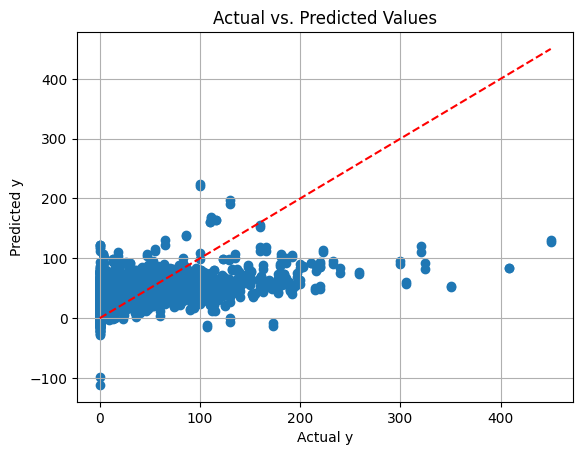

In [270]:
plt.scatter(edf['priv_edu'],y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red')  # Diagonal line for reference
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()


In [262]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Sample data - Replace this with your dataset
# X should be a pandas DataFrame containing the features, and y should be a pandas Series containing the target variable.
# For example:
# X = pd.DataFrame(data, columns=['feature1', 'feature2', ...])
# y = pd.Series(target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LassoCV model to perform L1 regularization and automatically select the best alpha (regularization strength)
lasso_model = LassoCV(cv=5)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Get the best alpha (regularization strength) selected by cross-validation
best_alpha = lasso_model.alpha_

# Get the coefficients of the selected features
selected_features = X.columns[lasso_model.coef_ != 0]

# Print the results
print("Best alpha (regularization strength):", best_alpha)
print("Selected features:", selected_features)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test set:", mse)

Best alpha (regularization strength): 853.8583973809467
Selected features: Index(['disposable_income', 'house_price'], dtype='object')
Mean Squared Error (MSE) on test set: 2572.7841420546183


InvalidIndexError: ('disposable_income', 11        21000.0
12        21000.0
21        25000.0
22       100000.0
23       100000.0
           ...   
12008     27000.0
12011     70000.0
12012     70000.0
12013     30000.0
12014     30000.0
Name: house_price, Length: 2627, dtype: float64)